In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_excel('C:/Users/Mubarak/combretum Dataset/combretum1.xlsx')

In [3]:
test=pd.read_excel('C:/Users/Mubarak/combretum Dataset/testcombretum.xlsx')

In [4]:
train.groupby(by='species')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
leaf_length       500 non-null float64
leaf_width        500 non-null float64
blade_length      500 non-null float64
petiole_length    500 non-null float64
species           500 non-null object
dtypes: float64(4), object(1)
memory usage: 19.6+ KB


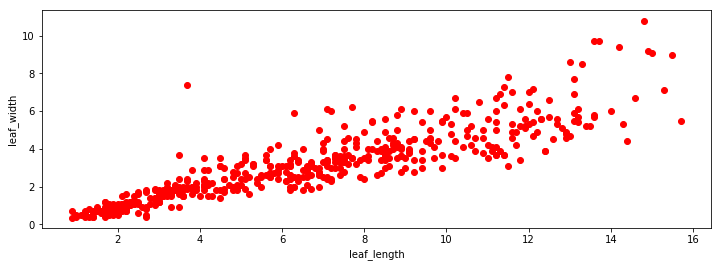

In [6]:
plt.figure(figsize=(12,4))
plt.xlabel('leaf_length')
plt.ylabel('leaf_width')
plt.scatter(x='leaf_length',y='leaf_width',data=train ,c='r')


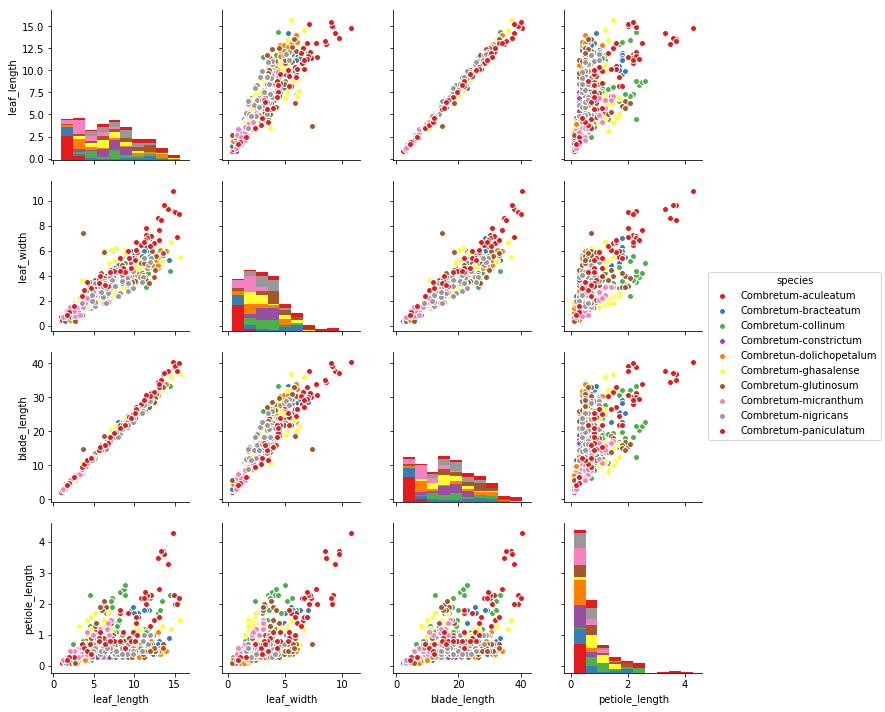

In [7]:
sns.pairplot(train,hue='species',palette='Set1')

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train.columns

Index(['leaf_length', 'leaf_width', 'blade_length', 'petiole_length',
       'species'],
      dtype='object')

In [10]:
best=train.head(200)

In [11]:
best['species'].value_counts()

Combretum-collinum       50
Combretum-constrictum    50
Combretum-bracteatum     50
Combretum-aculeatum      50
Name: species, dtype: int64

In [12]:
x=test[['leaf_length', 'leaf_width','blade_length','petiole_length']]
y=best['species']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

# DecisionTreeClassifier

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dtree = DecisionTreeClassifier()

In [16]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
predictions = dtree.predict(x_test)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
from sklearn import metrics

In [19]:
print(classification_report(y_test,predictions))

                       precision    recall  f1-score   support

  Combretum-aculeatum       0.89      0.77      0.83        22
 Combretum-bracteatum       0.38      0.45      0.42        11
   Combretum-collinum       0.93      1.00      0.97        14
Combretum-constrictum       0.77      0.77      0.77        13

          avg / total       0.78      0.77      0.77        60



In [22]:
print('The accuracy of decision forest is: ',metrics.accuracy_score(predictions,y_test))

The accuracy of decision forest is:  0.7666666666666667


# RandomForestClassifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
rfc_pred = rfc.predict(x_test)

In [25]:
print(classification_report(y_test,rfc_pred))

                       precision    recall  f1-score   support

  Combretum-aculeatum       0.89      0.73      0.80        22
 Combretum-bracteatum       0.27      0.27      0.27        11
   Combretum-collinum       0.88      1.00      0.93        14
Combretum-constrictum       0.73      0.85      0.79        13

          avg / total       0.74      0.73      0.73        60



In [26]:
print('The accuracy of random forest is: ',metrics.accuracy_score(rfc_pred,y_test))

The accuracy of random forest is:  0.7333333333333333


In [27]:
metrics.accuracy_score(rfc_pred,y_test)

0.7333333333333333

In [28]:
from sklearn import metrics

# LogisticRegression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr=LogisticRegression()

In [31]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
predict = lr.predict(x_test)

In [33]:
predict

array(['Combretum-aculeatum', 'Combretum-collinum', 'Combretum-aculeatum',
       'Combretum-constrictum', 'Combretum-constrictum',
       'Combretum-collinum', 'Combretum-collinum', 'Combretum-bracteatum',
       'Combretum-collinum', 'Combretum-collinum', 'Combretum-collinum',
       'Combretum-collinum', 'Combretum-constrictum',
       'Combretum-collinum', 'Combretum-collinum', 'Combretum-collinum',
       'Combretum-aculeatum', 'Combretum-aculeatum',
       'Combretum-constrictum', 'Combretum-aculeatum',
       'Combretum-constrictum', 'Combretum-constrictum',
       'Combretum-constrictum', 'Combretum-bracteatum',
       'Combretum-constrictum', 'Combretum-collinum',
       'Combretum-aculeatum', 'Combretum-collinum',
       'Combretum-constrictum', 'Combretum-aculeatum',
       'Combretum-aculeatum', 'Combretum-collinum', 'Combretum-collinum',
       'Combretum-aculeatum', 'Combretum-aculeatum',
       'Combretum-aculeatum', 'Combretum-bracteatum',
       'Combretum-constrictum'

In [34]:
print(classification_report(y_test,predict))

                       precision    recall  f1-score   support

  Combretum-aculeatum       0.92      1.00      0.96        22
 Combretum-bracteatum       0.50      0.18      0.27        11
   Combretum-collinum       0.75      0.86      0.80        14
Combretum-constrictum       0.81      1.00      0.90        13

          avg / total       0.78      0.82      0.78        60



In [35]:
print('The accuracy of logistic regression is: ',metrics.accuracy_score(predict,y_test))

The accuracy of logistic regression is:  0.8166666666666667


In [36]:
from sklearn.svm import SVC

In [37]:
model = SVC()

In [44]:
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
train.head()

,leaf_length,leaf_width,blade_length,petiole_length,species
0,3.4,2.1,9.1,0.4,Combretum-aculeatum
1,2.3,1.2,5.6,0.2,Combretum-aculeatum
2,2.0,1.1,5.0,0.2,Combretum-aculeatum
3,1.7,1.2,4.7,0.2,Combretum-aculeatum
4,2.2,1.6,6.0,0.2,Combretum-aculeatum


In [46]:
preda = model.predict(x_test)

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
print(confusion_matrix(y_test,preda))

[[15  0  0  0  0  0  2  0  0  0]
 [ 3  0  1  0  0  3  1  1  5  0]
 [ 0  2  3  2  1  1  2  0  2  1]
 [ 0  0  0  8  0  0  2  6  0  0]
 [ 0  1  3  3  3  0  2  3  4  0]
 [ 2  0  4  0  0  3  0  3  0  0]
 [ 3  0  0  1  0  0  5  3  0  0]
 [ 0  0  0  5  3  2  0  4  0  0]
 [ 0  0  1  1  0  1  0  0  8  0]
 [ 2  0  0  1  0  8  9  1  0  0]]


In [49]:
print(classification_report(y_test,preda))

                          precision    recall  f1-score   support

     Combretum-aculeatum       0.60      0.88      0.71        17
    Combretum-bracteatum       0.00      0.00      0.00        14
      Combretum-collinum       0.25      0.21      0.23        14
   Combretum-constrictum       0.38      0.50      0.43        16
    Combretum-ghasalense       0.43      0.16      0.23        19
    Combretum-glutinosum       0.17      0.25      0.20        12
    Combretum-micranthum       0.22      0.42      0.29        12
     Combretum-nigricans       0.19      0.29      0.23        14
   Combretum-paniculatum       0.42      0.73      0.53        11
Combretun-dolichopetalum       0.00      0.00      0.00        21

             avg / total       0.27      0.33      0.28       150



In [50]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [ ]:
grid.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.33613445378151263, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.36752136752136755, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=linear, score=0.38596491228070173, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................


In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
leaf_length       500 non-null float64
leaf_width        500 non-null float64
blade_length      500 non-null float64
petiole_length    500 non-null float64
species           500 non-null object
dtypes: float64(4), object(1)
memory usage: 19.6+ KB


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x=train[['leaf_length', 'leaf_width','blade_length','petiole_length']]
y=train['species']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)